# Baseball Case Study

## Importing requried Libraries:

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
#Checking the data type of each attribute
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

#### As per problem statement Target variable i.e. W is int64 i.e. continuous value so we Regression to learn our model.

# Exploratory Data Analysis:

In [4]:
#Checking shape of dataset
df.shape

(30, 17)

#### There are 30 rows and 17 columns in my dataset.

In [5]:
#Checking the data types of all columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

#### ERA is a float type data and except ERA all columns are int type data.

In [6]:
#Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


####So,I can there is a(1)float64 vallue and (16)int value and there are no null values. 

In [7]:
#Checking unique values of each columns
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

#### So, I can see these are number of unique values in each column.

In [8]:
#Checking null values in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#### No missing values are present in the given dataset.

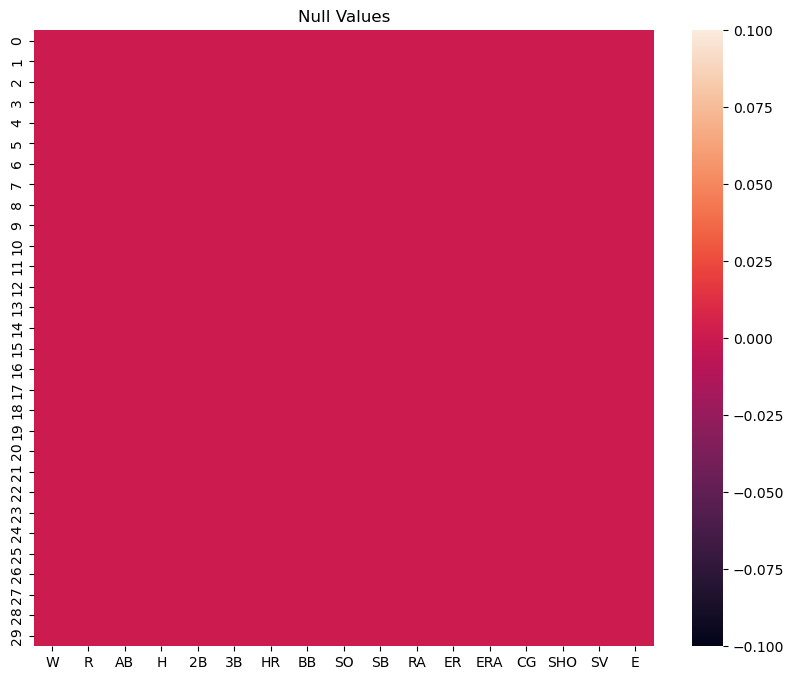

In [9]:
#Checking for null values in heat map
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

#### I can see in graph that there is no null values in the given dataset.

In [10]:
#Checking value counts of target column
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

#### I can see there are no missing values or spaaces in the target column.

In [11]:
#Checking description of dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### I can observe that all the columns have the count value of 30 there are no negative values and Few columns have very low values in it, where few have very low values in it, where few have very high values in the datset.

# Data Visualization:

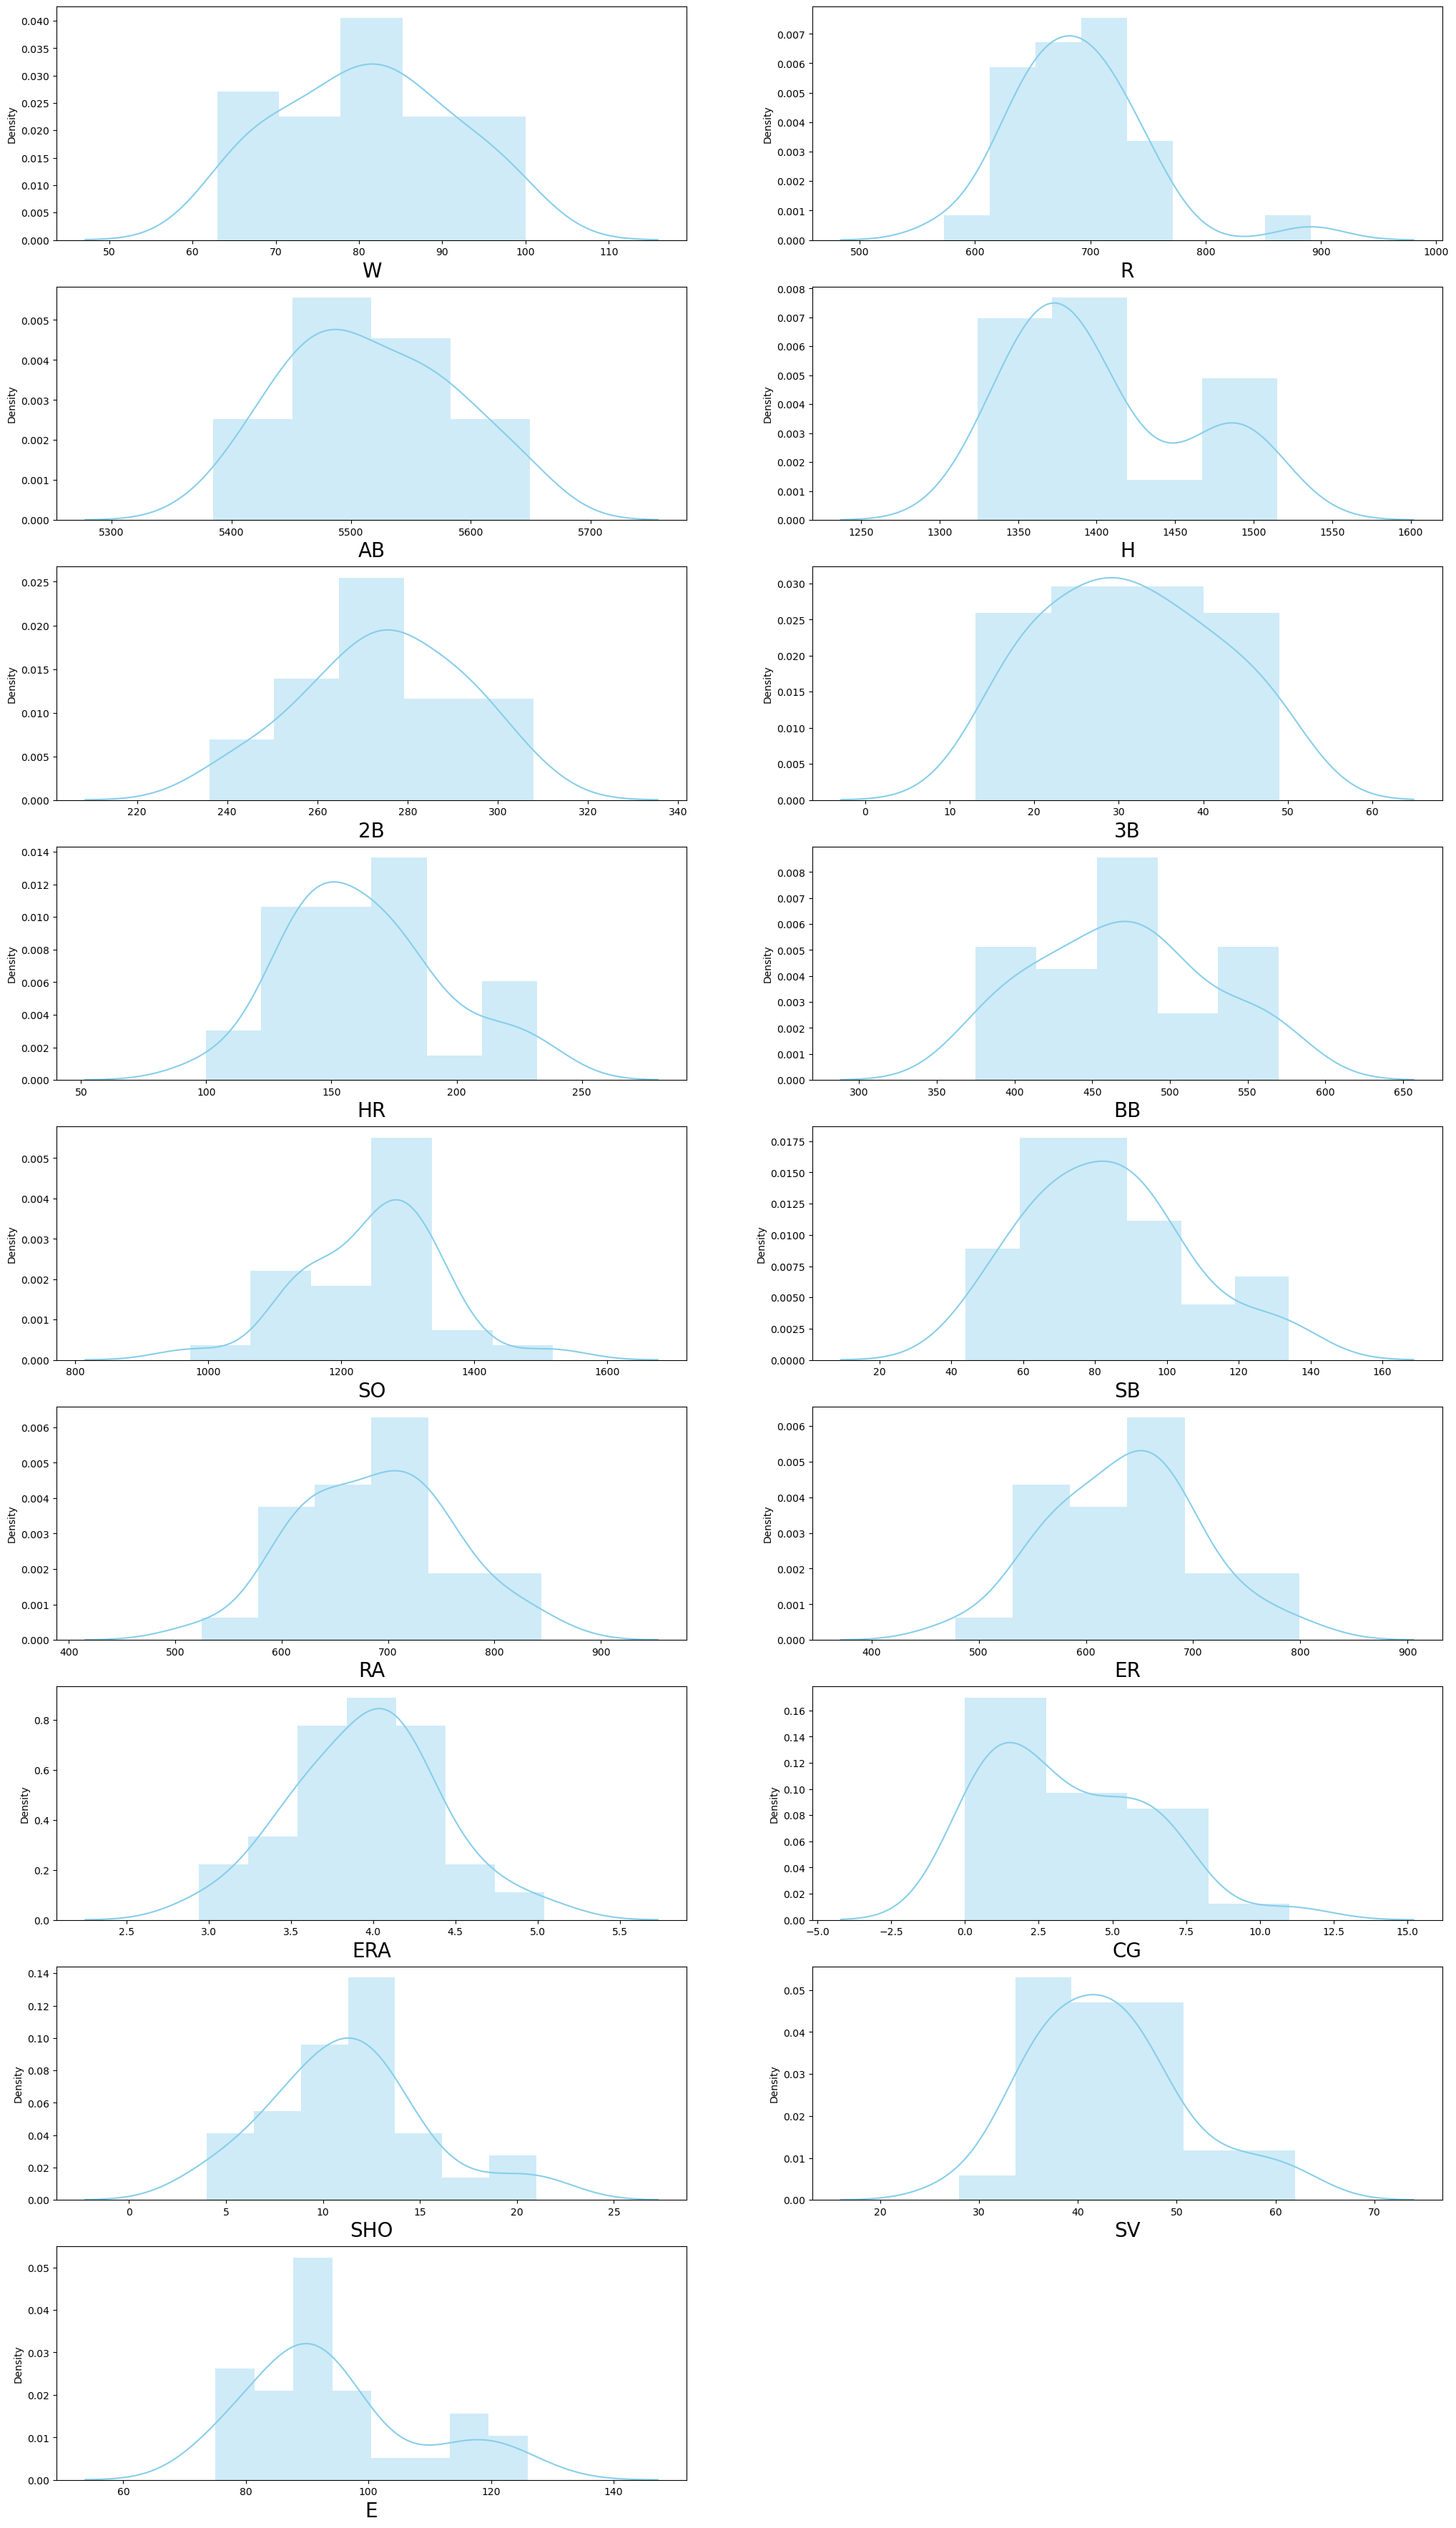

In [12]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

#### Almost all the columns are normally distributed.Except R,SO,CG and E.

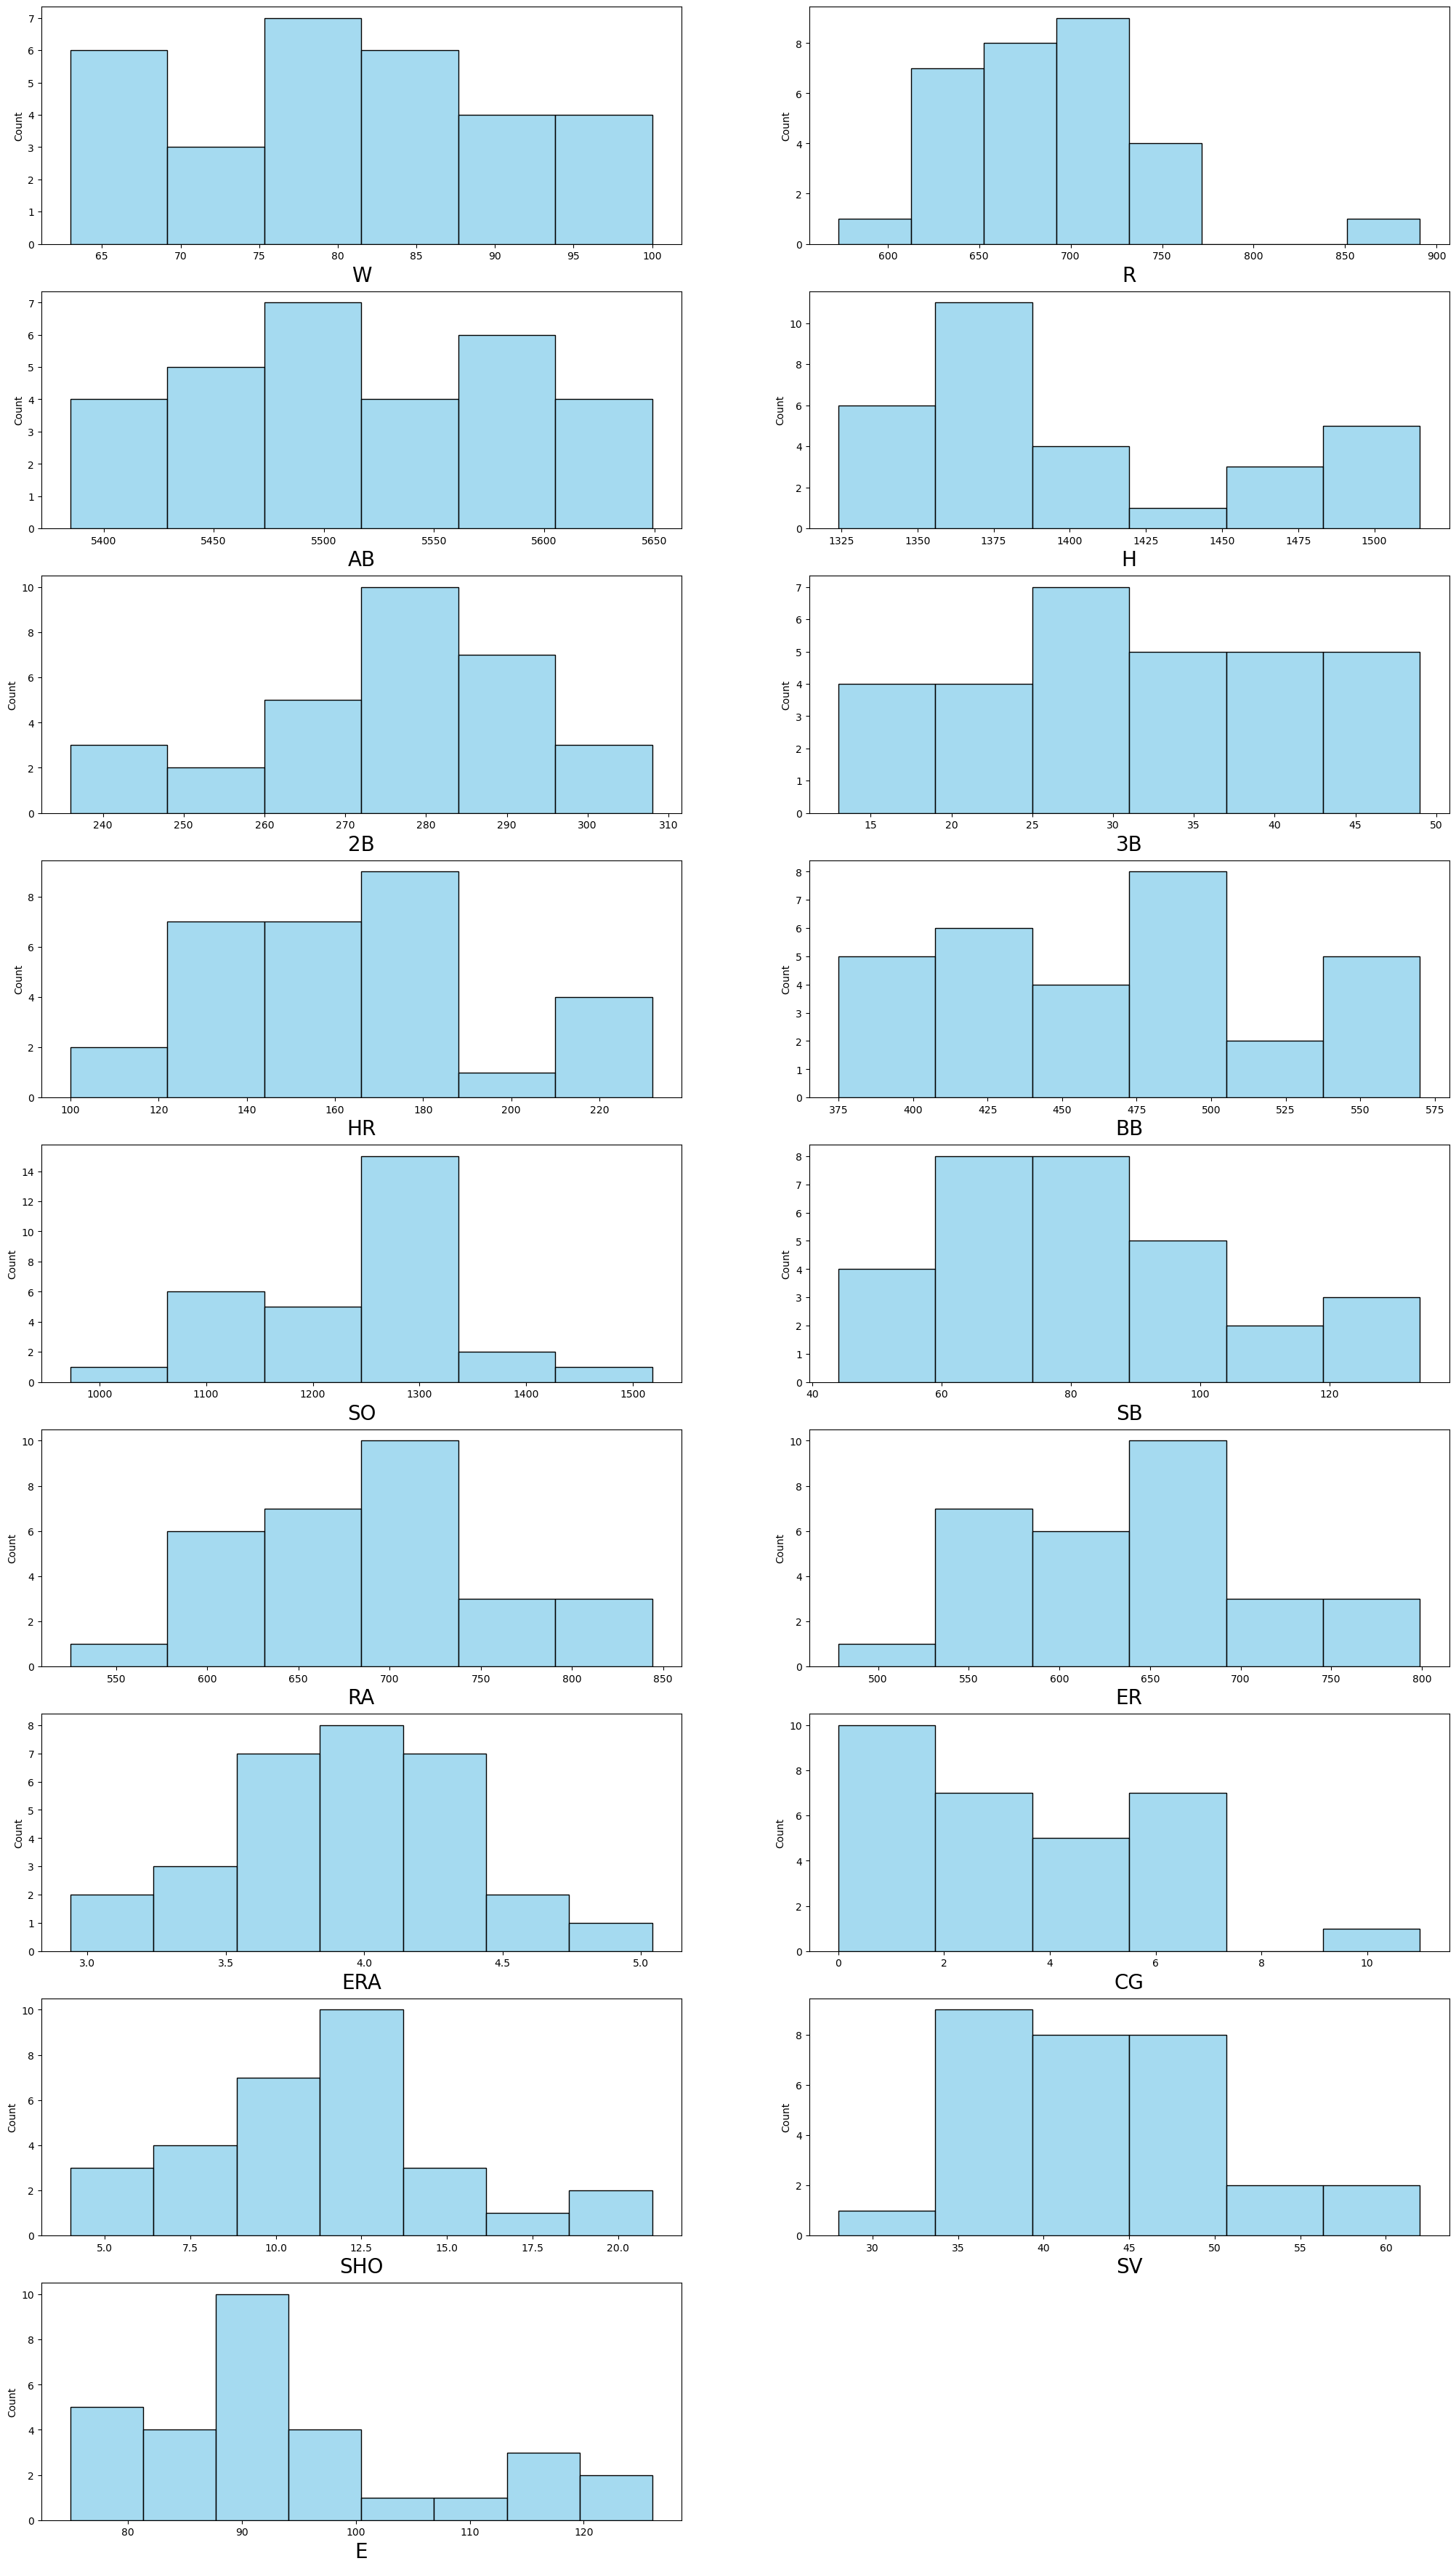

In [13]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

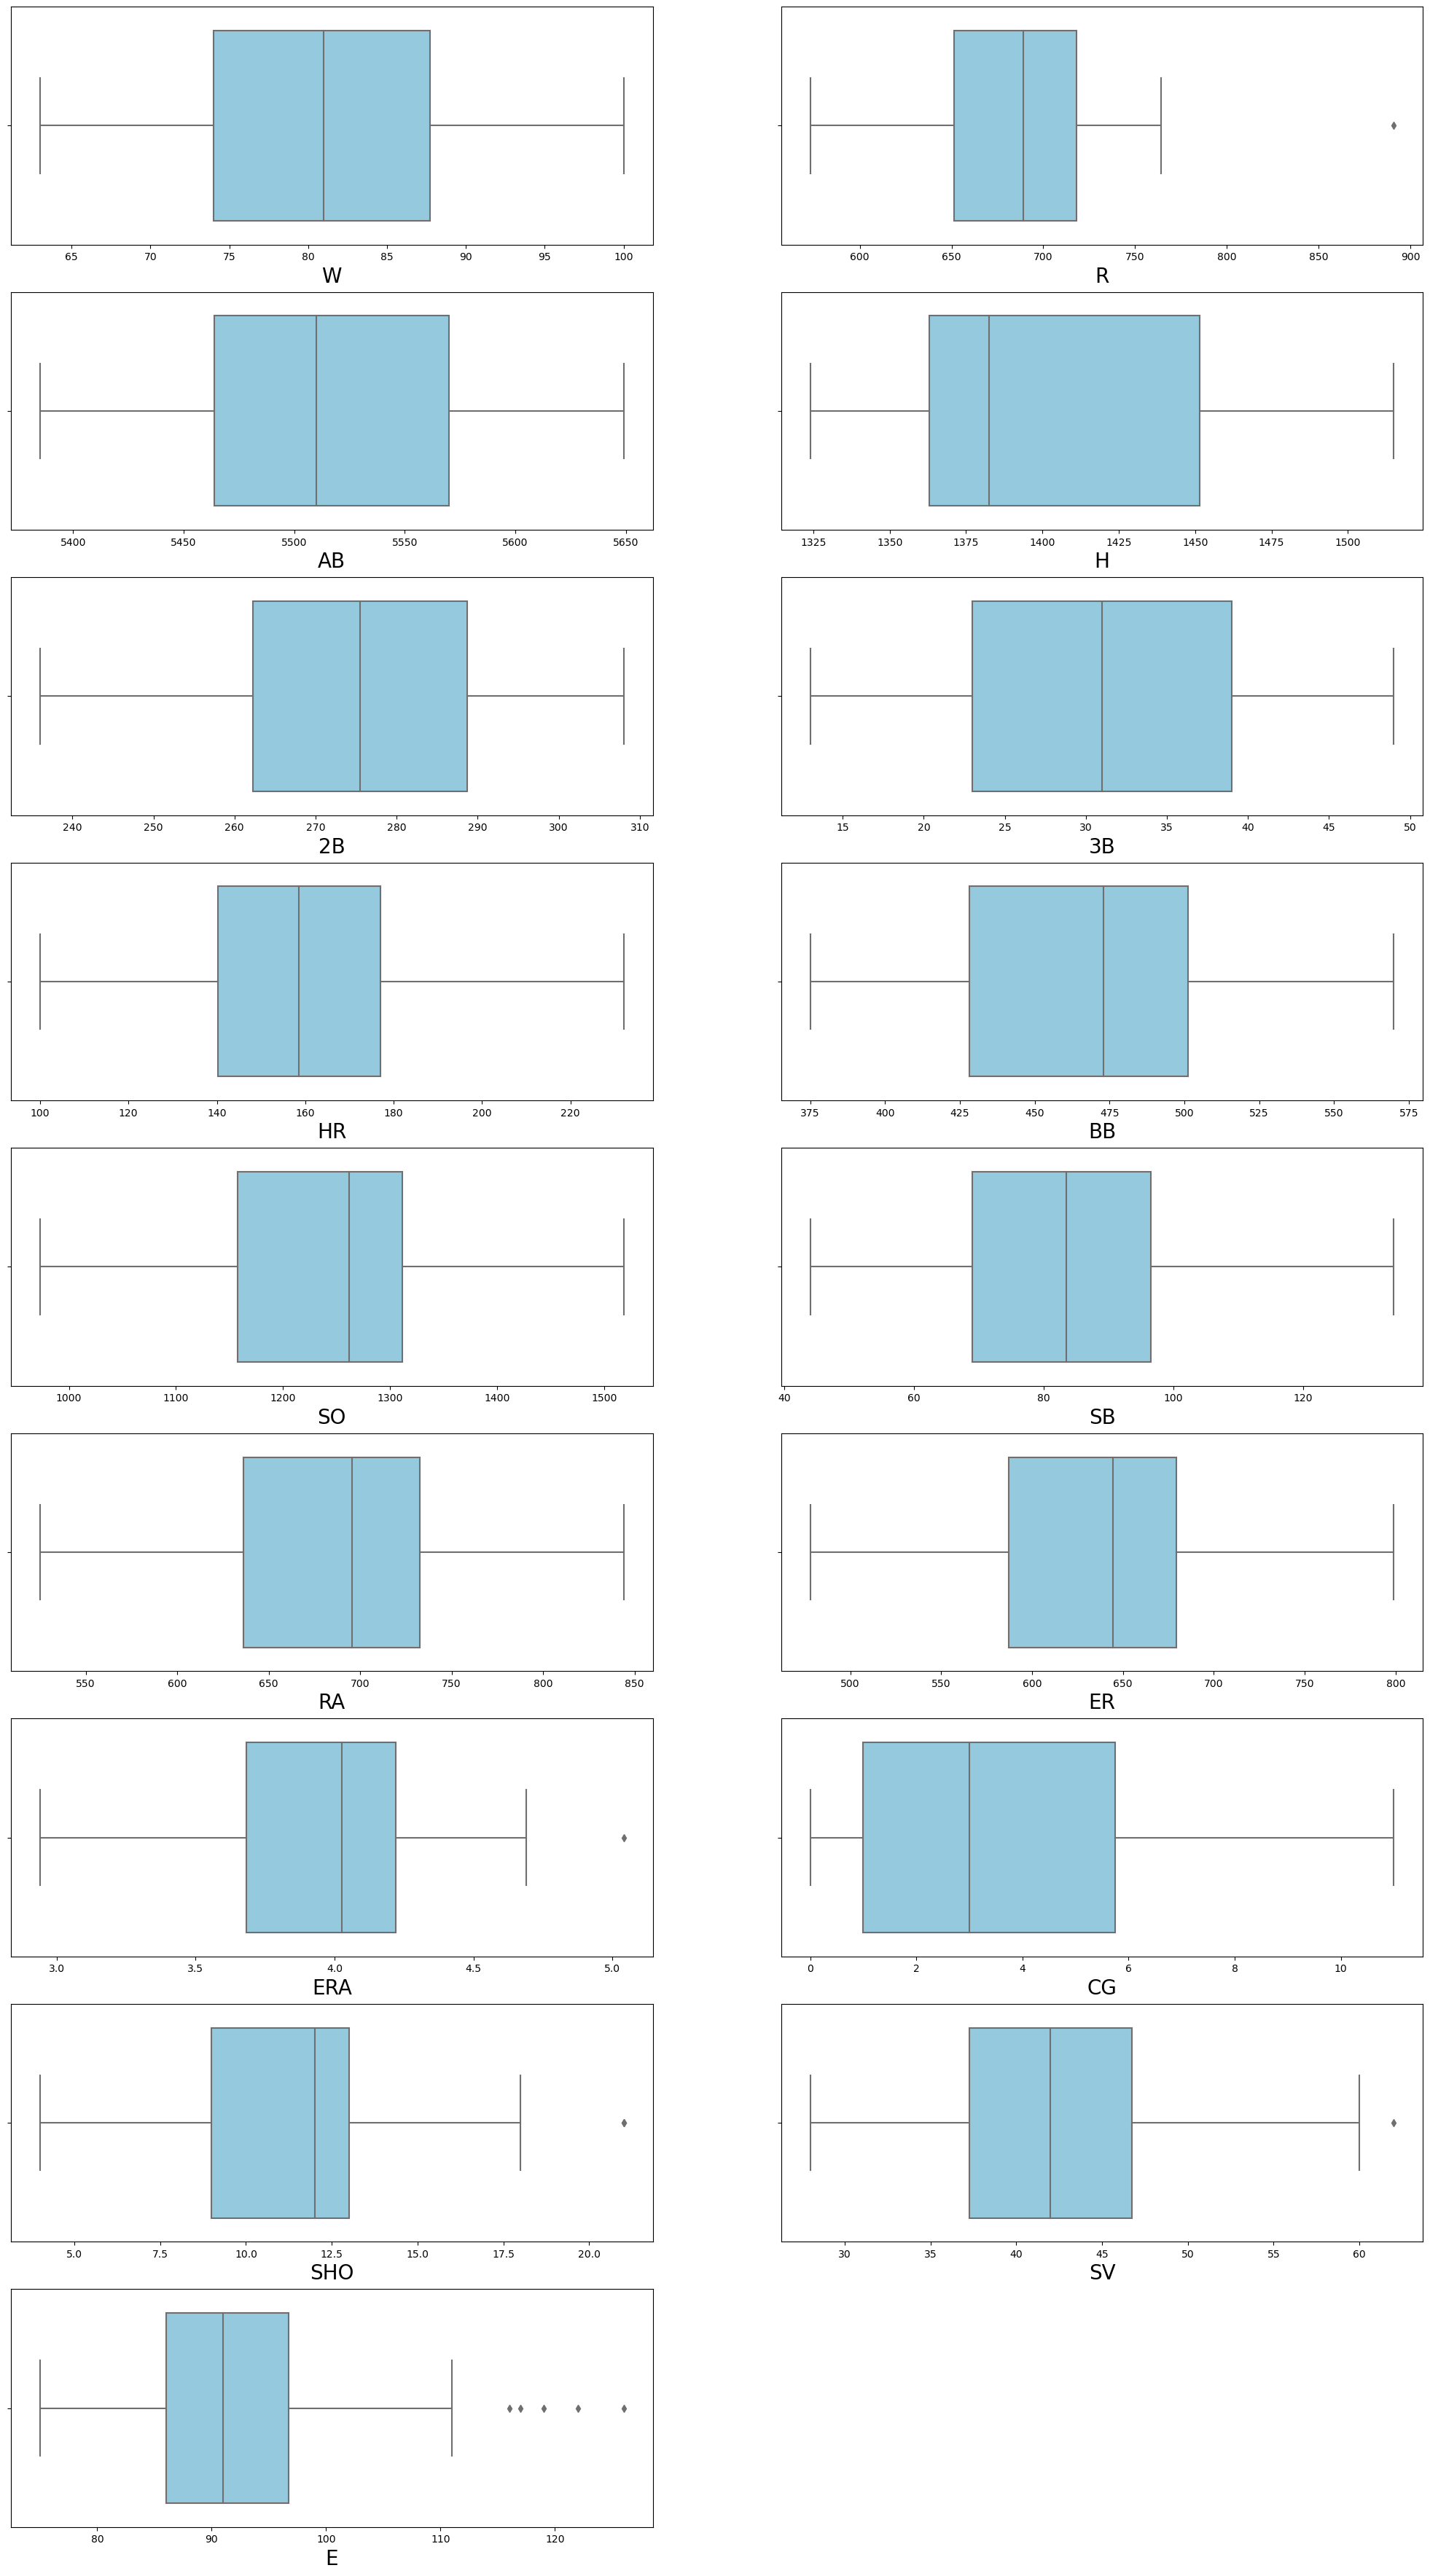

In [14]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

#### As shown in boxplot R,ERA,SHO,SV and E input variable is having outliers in it. So,we need remove outliers from that the input variables.

# Bivariate Analysis

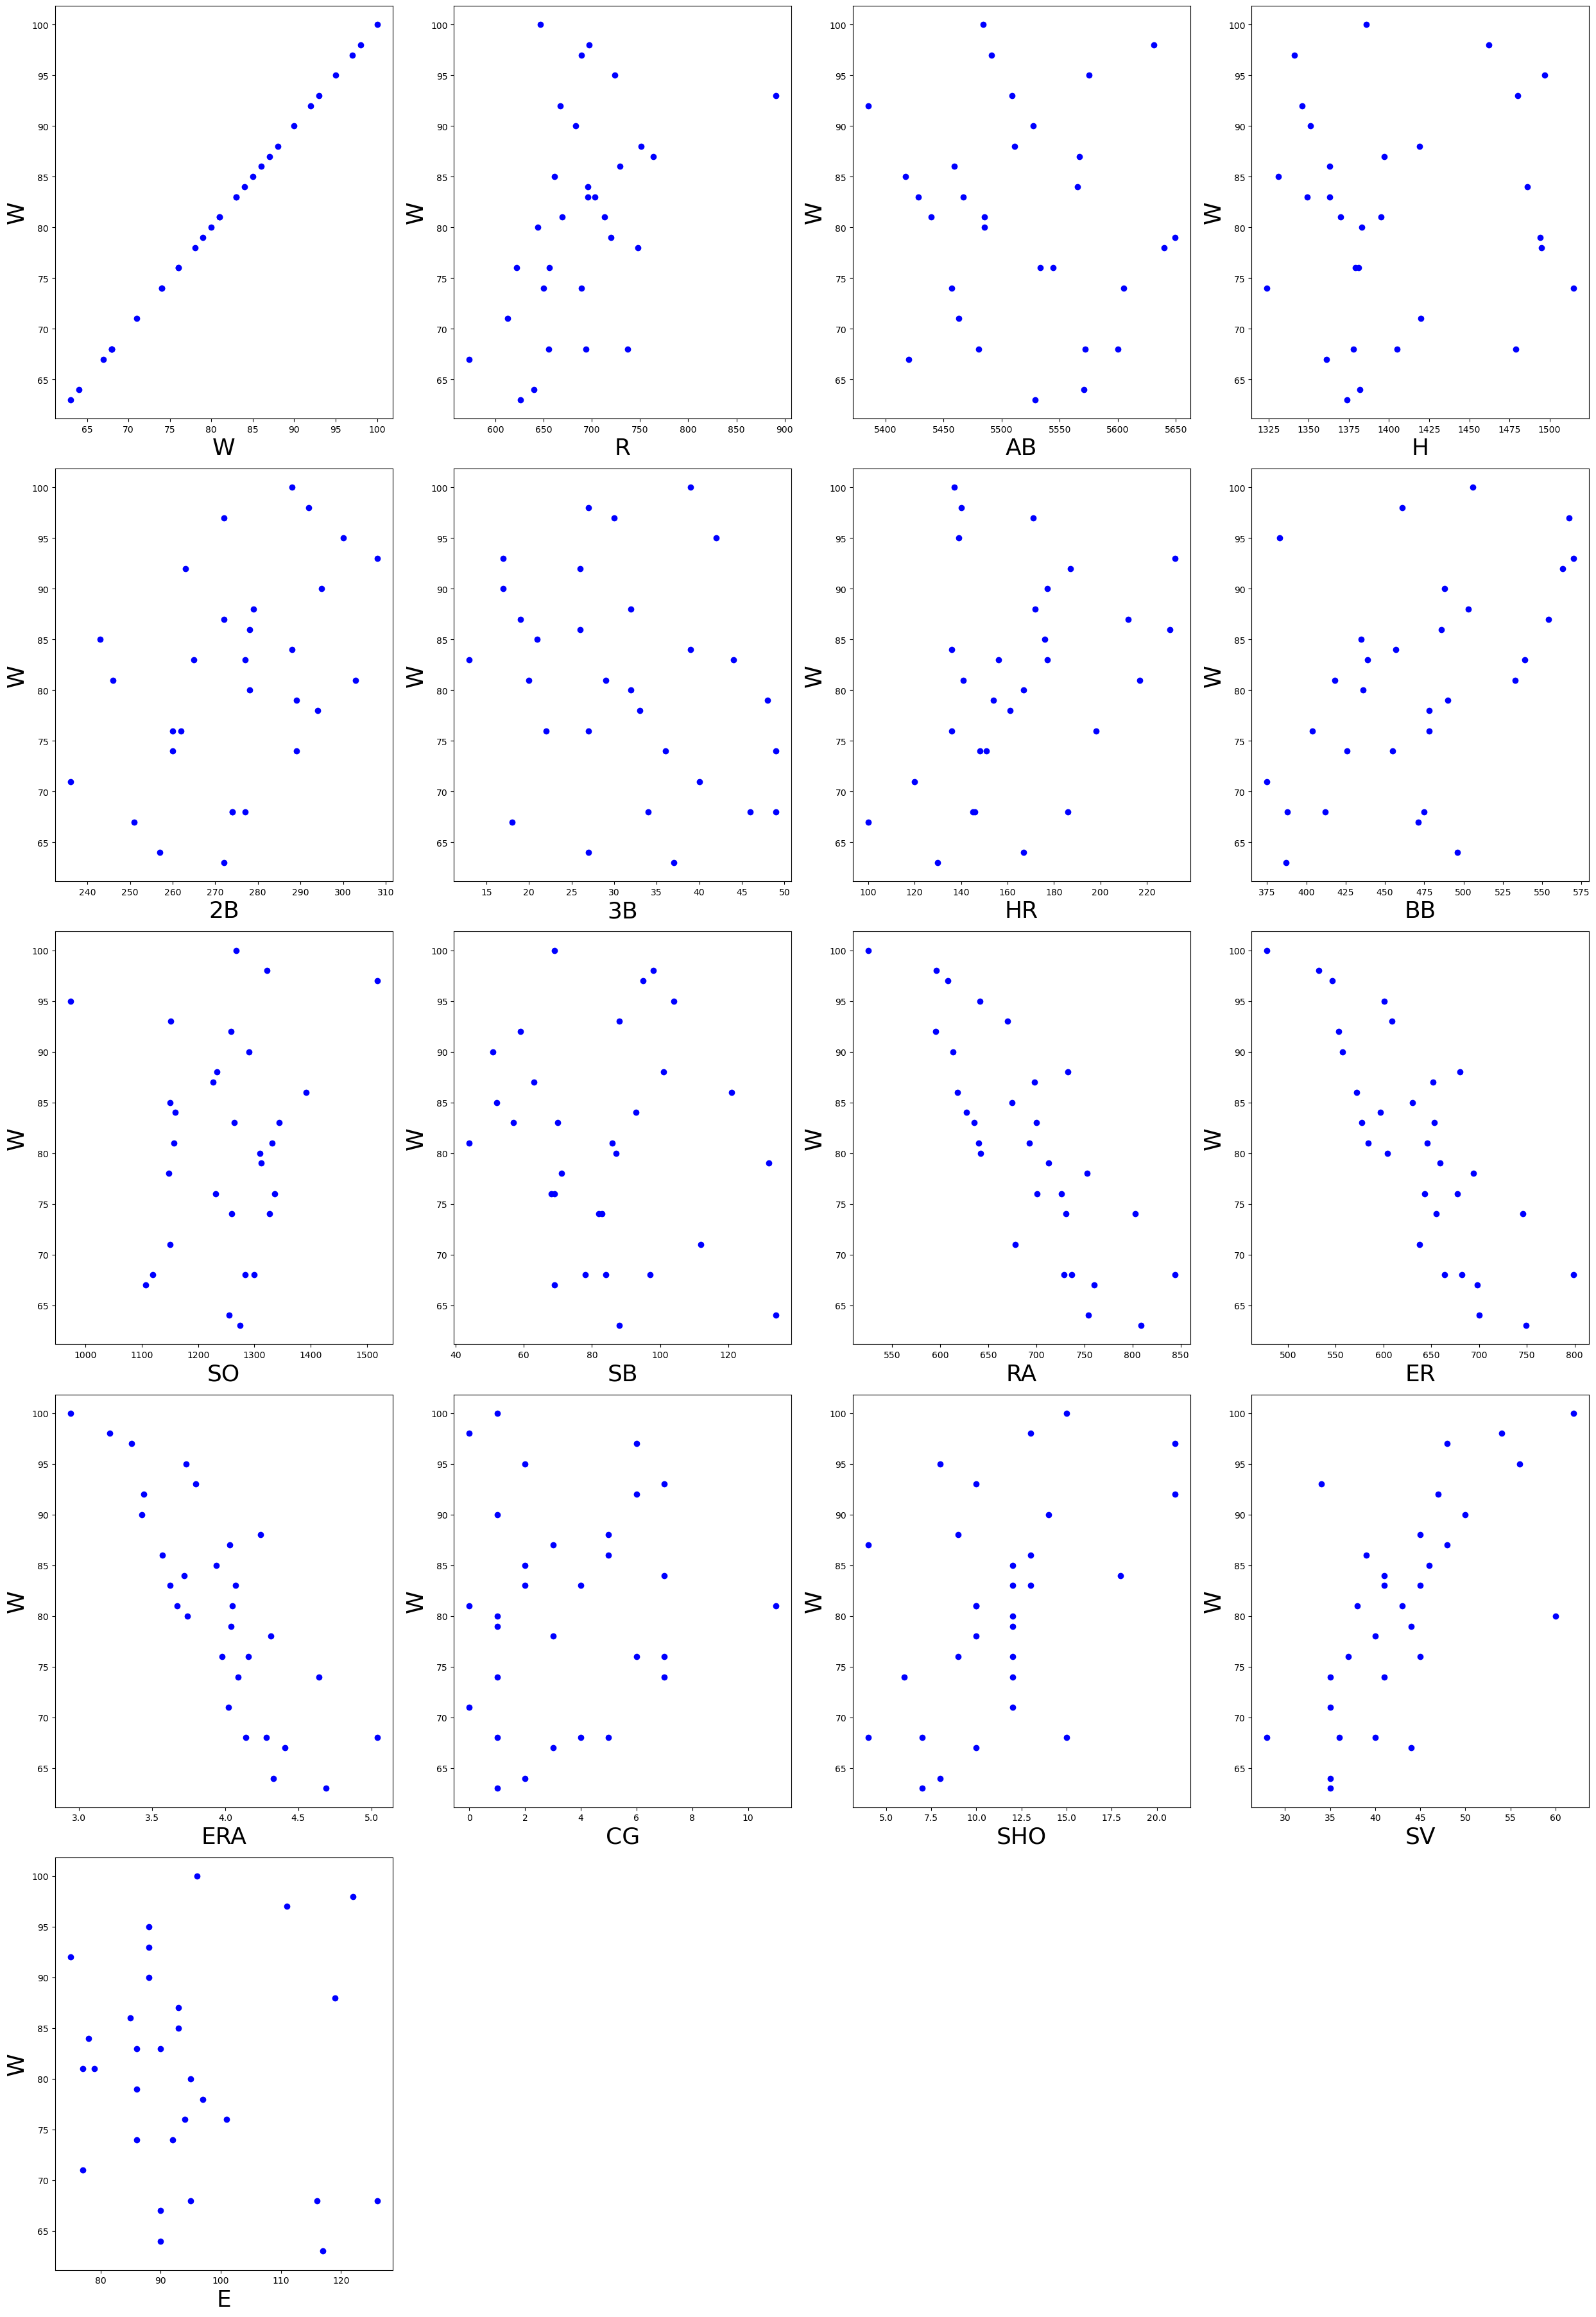

In [15]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()
    

#### As, we can see in plot SV,ERA,SHO and R is having almost linear relationship with target variable and other variables are having non linear relation ship with target variable.

<Figure size 2500x2000 with 0 Axes>

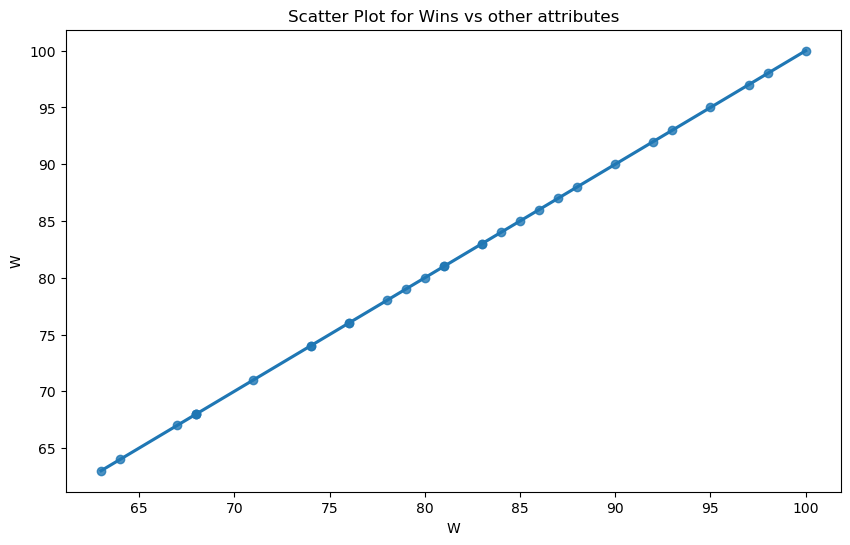

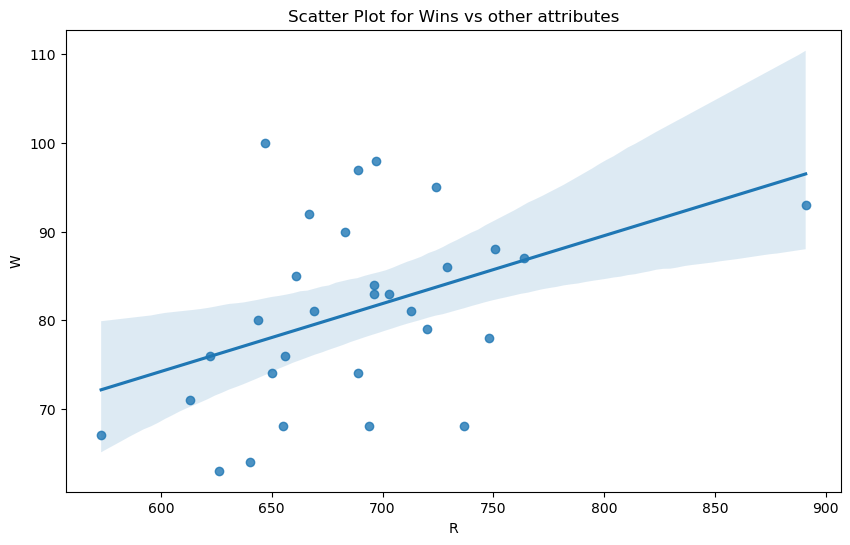

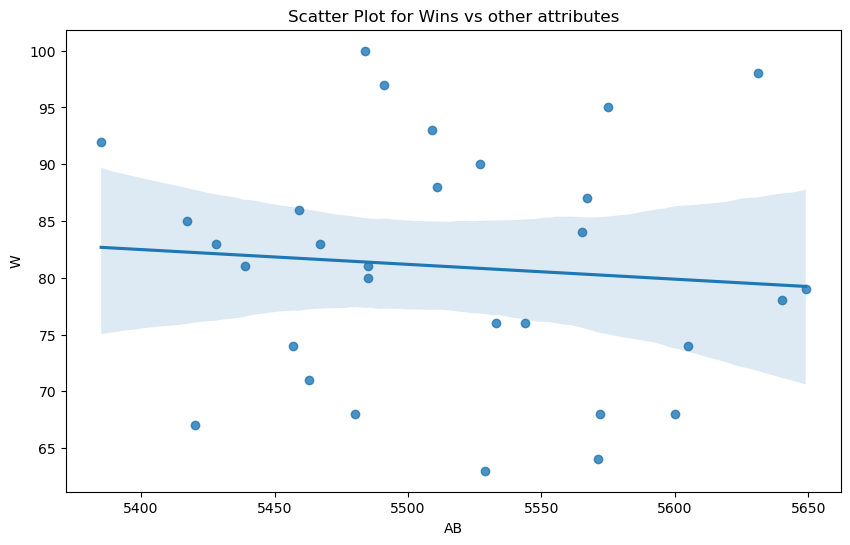

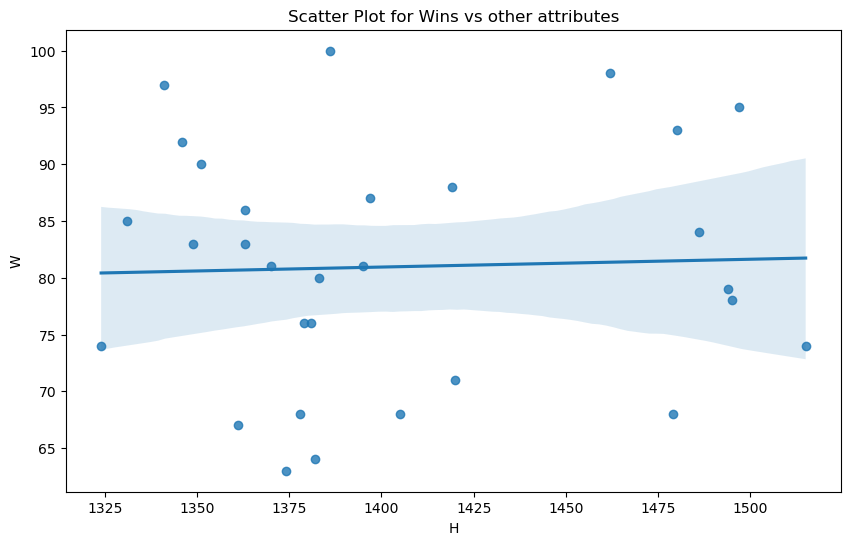

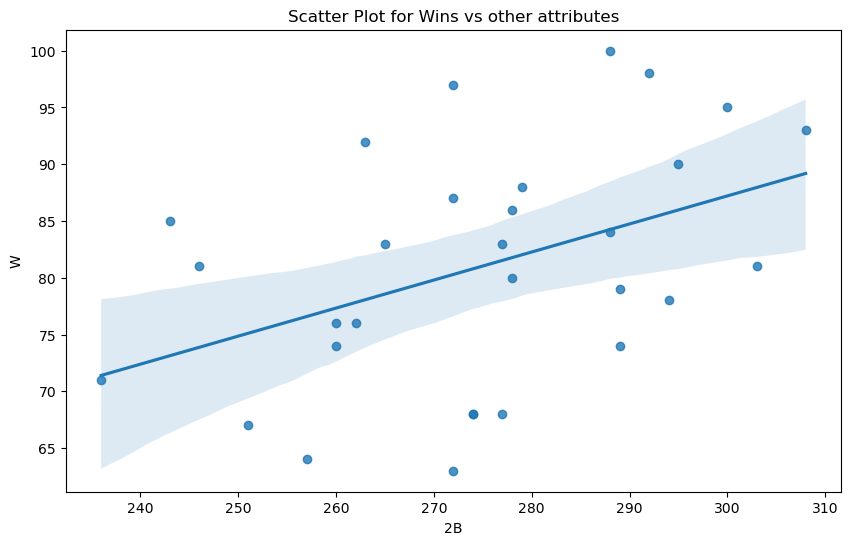

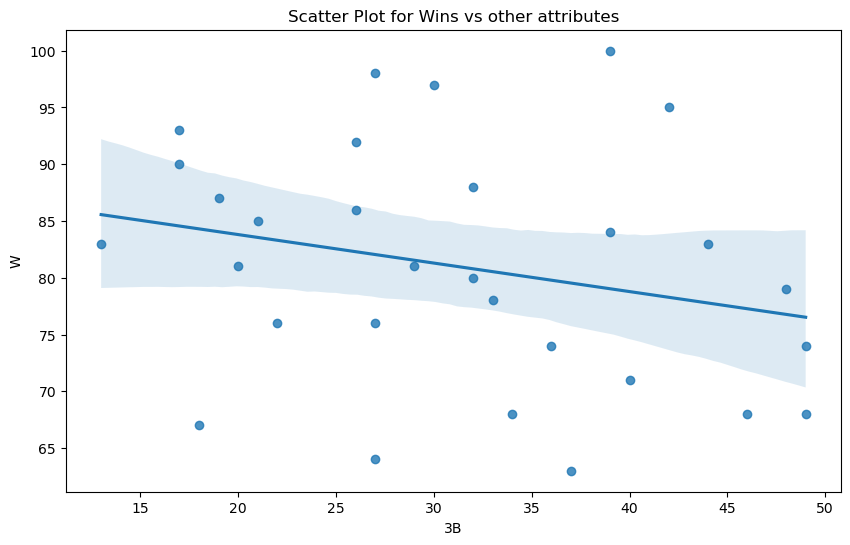

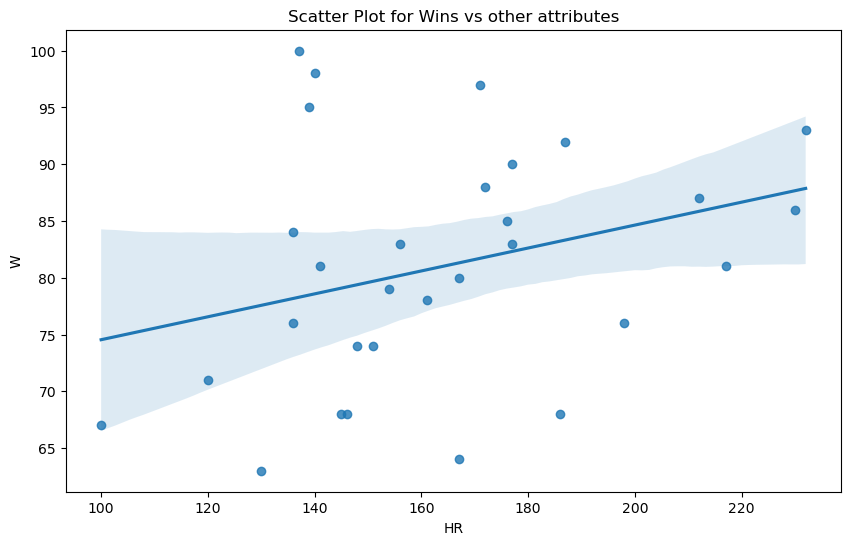

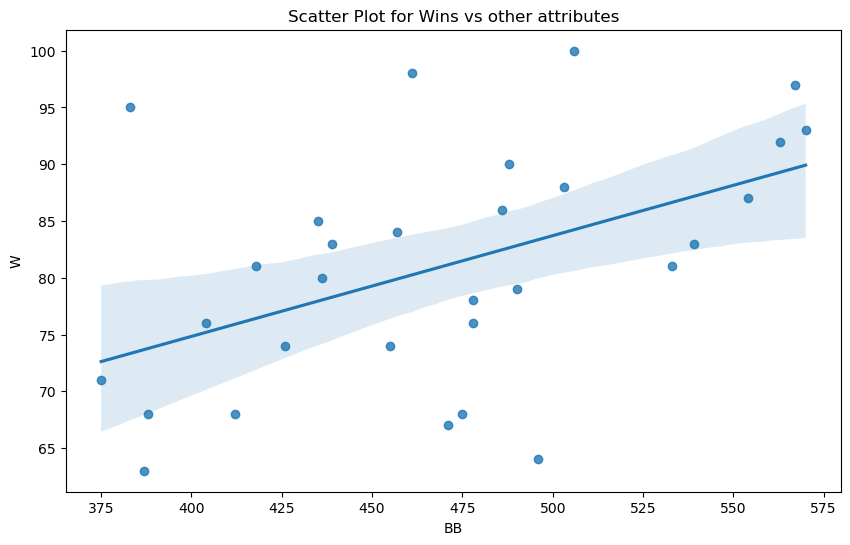

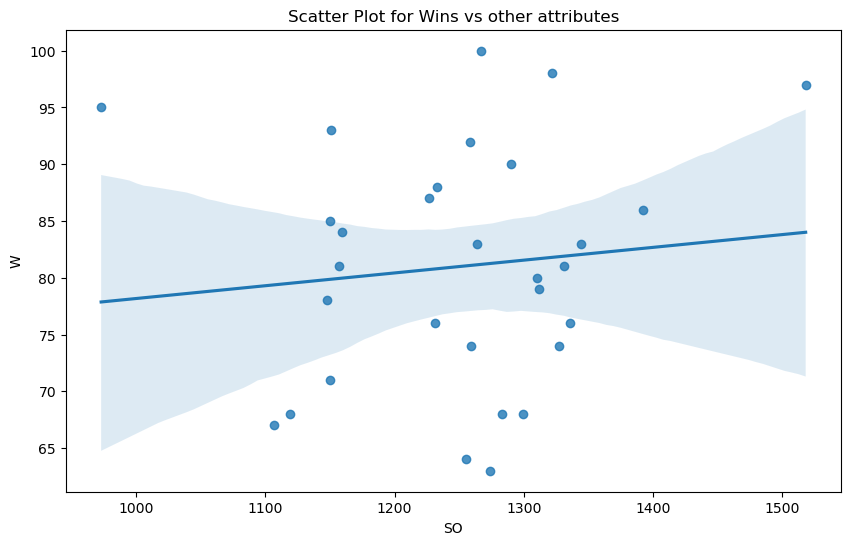

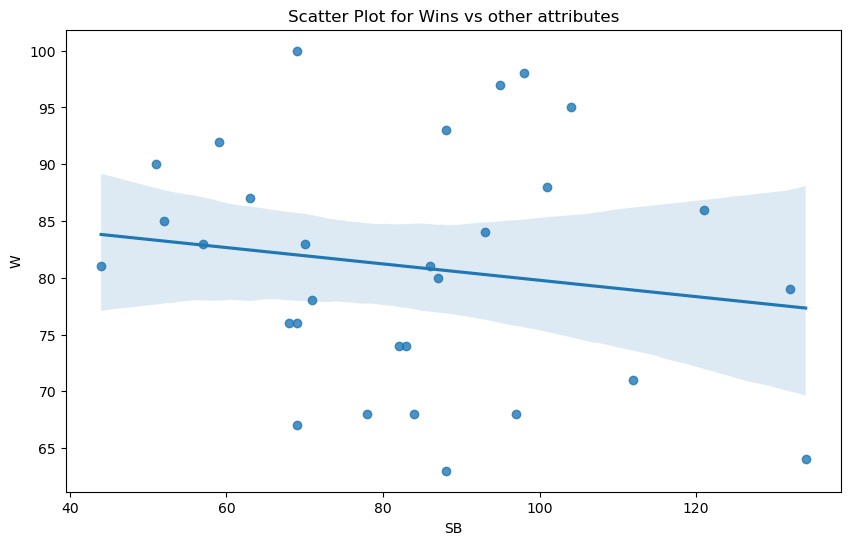

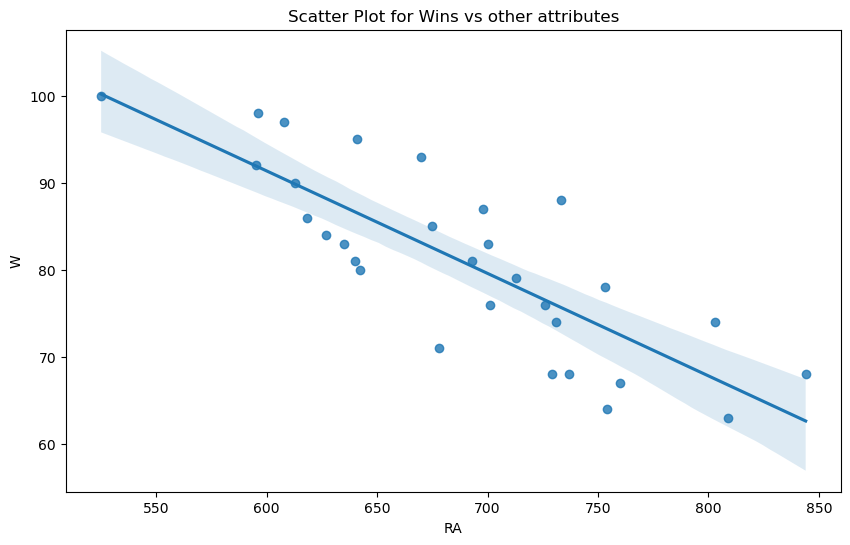

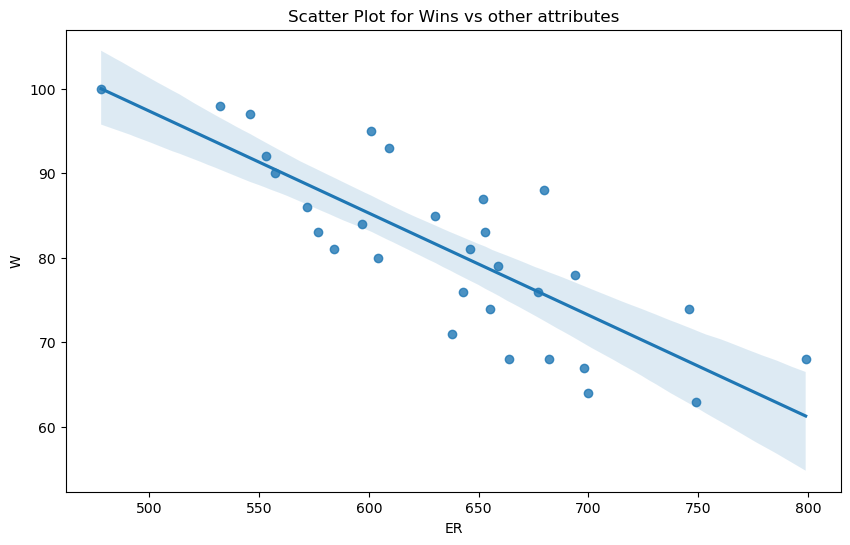

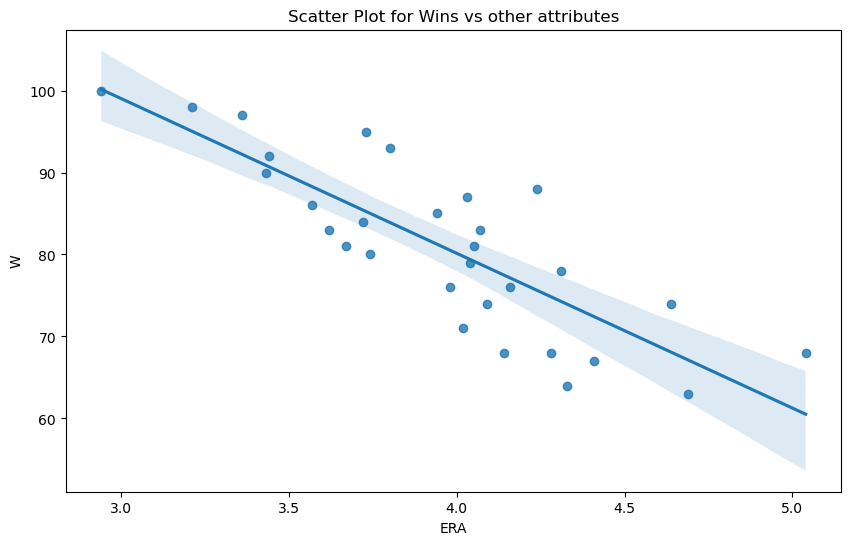

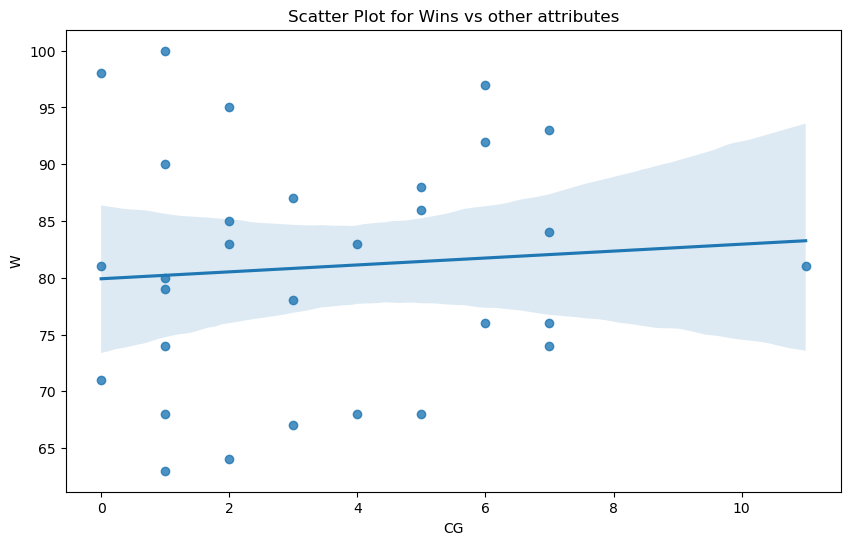

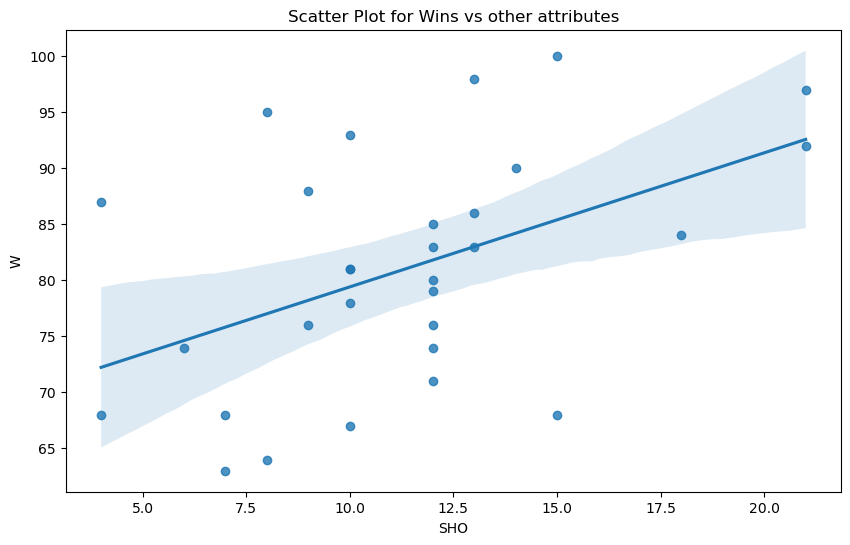

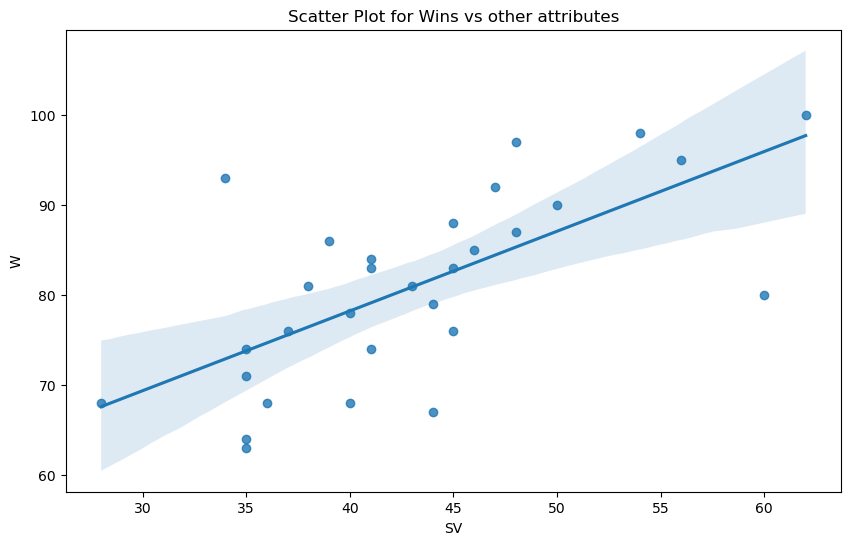

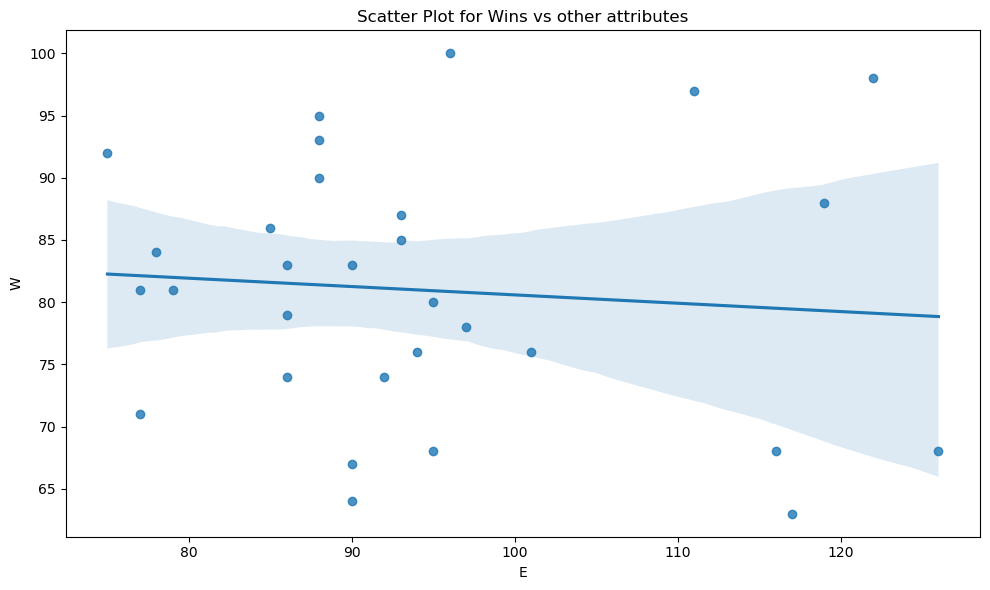

In [16]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

#### RA,ER,ERA have good relation with Win. Reset all the Columns does not good Relation with Win because data is scatter across all the places.

# Multivariate Analysis

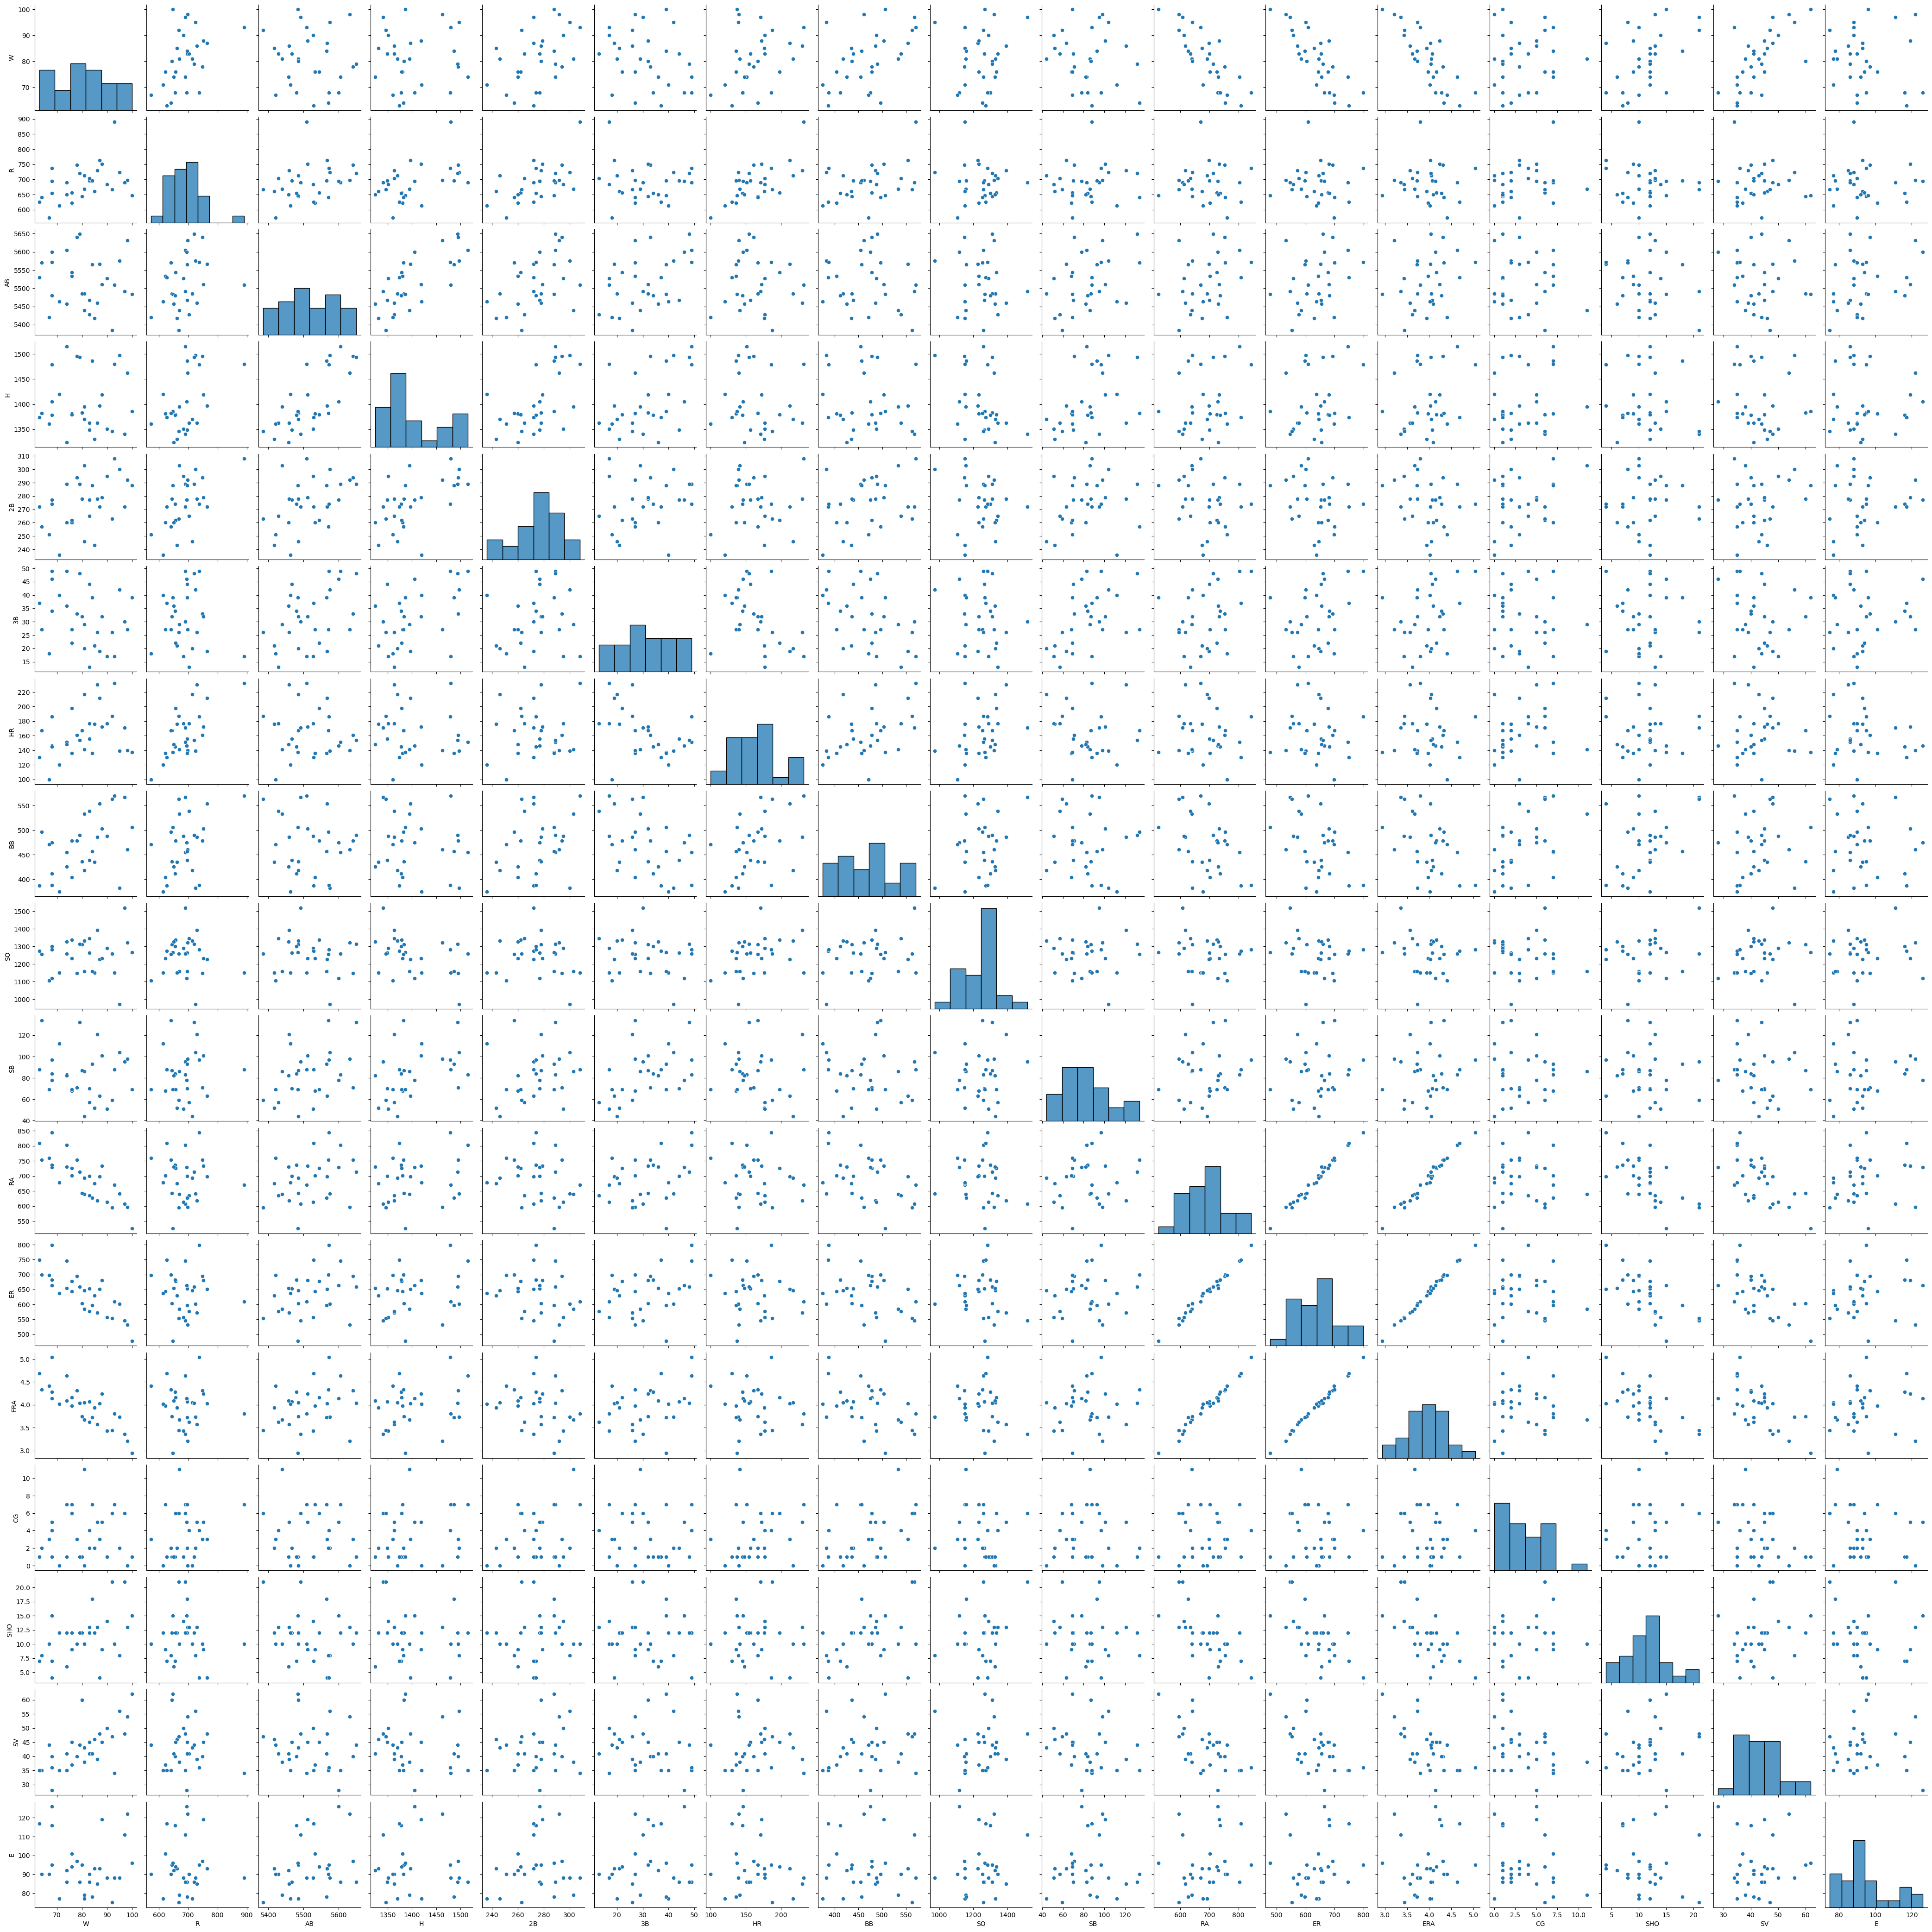

In [17]:
sns.pairplot(df)
plt.show()

#### Above the pair plots of each pair of features. I can observe whether they are making good correlation or if they are just scattered with out any pattern.

In [18]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show(

SyntaxError: unexpected EOF while parsing (3210814617.py, line 4)

In [ ]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

#### As we can see from the correlation matrix and the graph,ER,RA,ERA have the strongest correlation with wins but in negative nature.

#### Even though ER,RA and ERA are very negatively correlated with wins but they showed highest correlation amongst themselves of over 0.99.

# Outliers:

In [ ]:
df.plot(kind='box',fontsize=15,figsize=(25,25),color='b')

#### By observing the box plot i can say that there are outliers are R-Runs,ERA-Earned Run average,SHO-Shutout,SV-Saves,E-Errors.

# Removing Outliers:


## Zscore method:

In [ ]:
#Features having outliers
features=df[['R','ERA','SHO','SV','E']]

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

In [ ]:
#Checking shape of new dataset
df_new.shape


In [ ]:
#Checking shape of old dataset
df.shape

In [ ]:
#Checking dataloss
Dataloss = (((30-29)/30)*100)
Dataloss

In [ ]:
#Checking for Skewness
df_new.skew()

#### I can see that there is skewness in Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E)

In [ ]:
#list of skewed features
skew_features=["H","CG","SHO","SV","E"]

In [ ]:
#Removing skewness in H using log1p
df_new["H"]=np.log1p(df_new["H"])

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

In [ ]:
#Removing skewness using yeo-johnson
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)
#Checking skewness after removing skewness
df_new.skew()

In [ ]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### By seeing the plot i can say that skewness is removed.

In [ ]:
#Splitting the columns
x = df_new.drop("W",axis=1)
y = df_new["W"]

## Scaling Data using StandardScaler

In [ ]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [ ]:
X.head()

# Variance inflation factor:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

#### VIF values i can say that multicolinearity exists in RA,ER,ERA. So let me drop RA and ER columns to avoid multicolinearity.

In [ ]:
#Droping ER
X = X.drop(["ER"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

#### Still VIF is high for 2 columns so let me drop ERA.

In [ ]:
#Droping RA
X = X.drop(["ERA"],axis=1)


In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
#Let find the best random state

In [ ]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

In [ ]:
#Splitting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

# 1)Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

In [ ]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

# 2)SGD:

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

# 3)Lasso Regressor:

In [ ]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

In [ ]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

# 4)Ridge Regressor:

In [ ]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

In [ ]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

# Cross Validation:

In [ ]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))


# Hyper Parameter Tuning:

In [ ]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [ ]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)

In [ ]:
GVC.fit(x_train,y_train)

In [ ]:
GVC.best_params_

In [ ]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

#### After tuning i got 79.48% accuracy which is good.

## Predictions:

In [ ]:
#Loading the saved model
model=joblib.load("BaseballCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

In [ ]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])